In [1]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv("data.csv")

In [25]:
len(df)

11914

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [58]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [59]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
df.dtypes[df.dtypes == 'object']  # left is index, right is value

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [60]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [61]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory Data Analysis

In [62]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique()[:5])
    print()

make
48
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
914
['1_series_m' '1_series' '100' '124_spider' '190-class']

year
28
[2011 2012 2013 1992 1993]

engine_fuel_type
10
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
356
[335. 300. 230. 320. 172.]

engine_cylinders
9
[ 6.  4.  5.  8. 12.]

transmission_type
5
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
4
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

number_of_doors
3
[ 2.  4.  3. nan]

market_category
71
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']

vehicle_size
3
['compact' 'midsize' 'large']

vehicle_style
16
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']

highway_mpg
59
[26 28 27 25 24]

city_mpg
69
[19 20 18 17 16]

popularity
48
[3916 3105  819  617 1013]

msrp
6049
[46135 40650 36350 2945

In [63]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='msrp', ylabel='Count'>

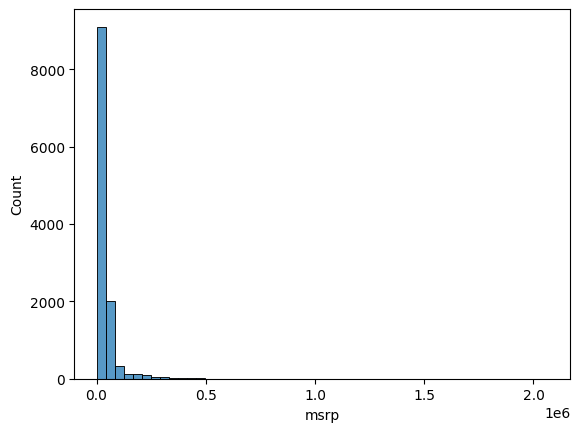

In [64]:
sb.histplot(df.msrp, bins=50)  # bins means how many bars in horizon

# 1e6 = 10 ** 6, 1 million
# This data is Long TAIL, most of data in left, but there are some values have huge values

<Axes: xlabel='msrp', ylabel='Count'>

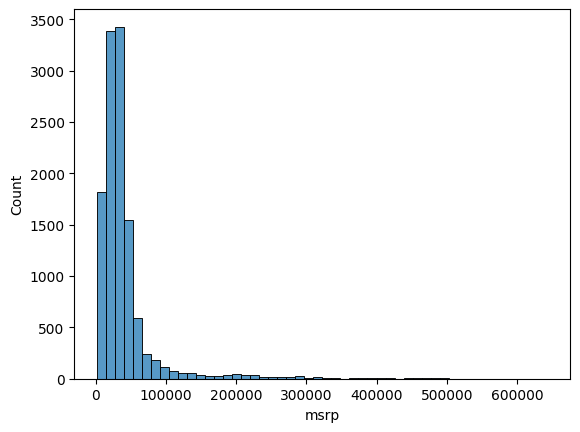

In [65]:
sb.histplot(df.msrp[df.msrp < 1000000], bins=50)

In [15]:
# these long tail is not useful... so get rid of it!
# To do this, let's apply logarithm to price! after that, we can get compact values..

In [16]:
np.log([0, 1, 10, 100, 1000, 100000])  # log of big number is not really big

/var/folders/6g/txmf0w9537n2yz58hrhtwhkh0000gn/T/ipykernel_5851/662271713.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 100, 1000, 100000])  # log of big number is not really big


array([       -inf,  0.        ,  2.30258509,  4.60517019,  6.90775528,
       11.51292546])

In [17]:
np.log([0+1, 1+1, 10+1, 100+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [18]:
np.log1p([0, 1, 10, 100, 1000, 100000]) # same result of previous one

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [19]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

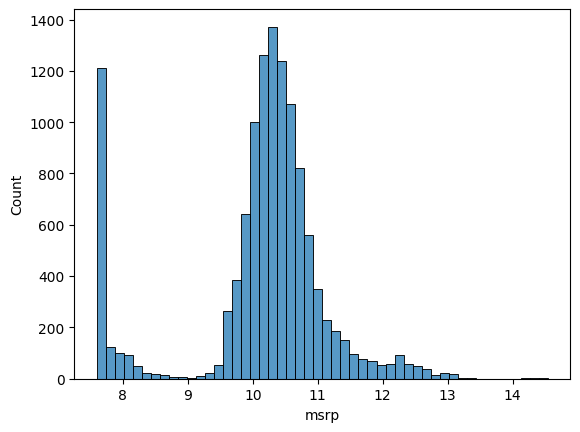

In [20]:
sb.histplot(price_logs, bins=50) # normal distribution

In [21]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# Setting Up The Validation Framework

In [66]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6) 

In [29]:
n, n_val + n_test + n_train  # numbers are not equal!

(11914, 11912)

In [67]:
n_train = n - (n_val + n_test)

In [68]:
n, n_val + n_test + n_train # same now!

(11914, 11914)

In [69]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [70]:
df.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [71]:
df_val = df.iloc[:n_val]
df_test =df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [72]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [37]:
# all BMW are in validation dataset, we have to shuffle it!

In [73]:
idx = np.arange(n)

In [74]:
np.random.shuffle(idx)

In [75]:
idx[n_train:]

array([ 1896,  3731,  4850, ...,  3168, 11119,  5227])

In [76]:
df_val = df.iloc[idx[n_train:]]
df_test = df.iloc[idx[n_train:n_train+n_val]]
df_train = df.iloc[idx[n_train+n_val:]]

In [77]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9163,dodge,shadow,1993,regular_unleaded,100.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,convertible,29,22,1851,2000
7934,infiniti,qx60,2015,premium_unleaded_(recommended),265.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury",large,4dr_suv,27,21,190,42400
7394,mitsubishi,outlander,2017,regular_unleaded,166.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,29,24,436,27495
1120,audi,a6,2017,premium_unleaded_(recommended),252.0,4.0,automated_manual,front_wheel_drive,4.0,luxury,midsize,sedan,34,24,3105,47600
6966,chevrolet,monte_carlo,2005,premium_unleaded_(required),240.0,6.0,automatic,front_wheel_drive,2.0,performance,midsize,coupe,26,17,1385,28355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,toyota,tacoma,2017,regular_unleaded,278.0,6.0,manual,four_wheel_drive,4.0,NaN,compact,crew_cab_pickup,20,17,2031,33075
3354,mazda,cx-5,2014,regular_unleaded,184.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,30,24,586,26065
3168,chevrolet,cruze,2017,regular_unleaded,153.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,39,28,1385,18525
11119,volvo,v60_cross_country,2017,regular_unleaded,240.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,wagon,30,22,870,41700


In [48]:
# new problem : different result! -> make it reproducible!

In [78]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [79]:
df_val = df.iloc[idx[n_train:]]
df_test = df.iloc[idx[n_train:n_train+n_val]]
df_train = df.iloc[idx[n_train+n_val:]]

In [80]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


In [81]:
# test again : same computer, same result
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
df_val = df.iloc[idx[n_train:]]
df_test = df.iloc[idx[n_train:n_train+n_val]]
df_train = df.iloc[idx[n_train+n_val:]]
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


In [53]:
len(df_val), len(df_test), len(df_train)

(4764, 2382, 2382)

In [82]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [83]:
# drop index
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [90]:
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train = np.log1p(df_train.msrp.values)

In [91]:
# # remove data not to use it accidently
del df_val['msrp']
del df_test['msrp']
del df_train['msrp']